# Lab 2: Classification (Part 1)

### Due Feburary 9th, 2021 11:59 PM CST

#### Logistics and Lab Submission

See the [course website](https://courses.engr.illinois.edu/ece365/fa2019/logisticsvvv.html).

#### What You Will Need To Know For This Lab

This lab covers some basic classifiers which can be used for M-ary classification.

- Bayes Classifiers
- Linear Discriminant Analysis
- k-Nearest Neighbors

The submission procedure is provided below:
- You will be provided with a template Python script (main.py) for this lab where you need to implement the provided functions as needed for each question. Follow the instructions provided in this Jupyter Notebook (.ipynb) to implement the required functions. **Do not change the file name or the function headers!**
- Upload only your Python script (.py file) on Gradescope. Don't upload your datasets or Jupyter Notebook (.ipynb file).
- Your grades and feedbacks will appear on Gradescope. The grading for the programming questions is automated using Gradescope autograder, no partial credits are given. Therefore, if you wish, you will have a chance to re-submit your code **within 72 hours** of receiving your first grade for this lab, only if you have *reasonable* submissions before the deadline (i.e. not an empty script).
- If you re-submit, the final grade for the programming part of this lab will be calculated as .4 \* first_grade + .6 \* .9 \* re-submission_grade.
- This lab also has Multiple Choice Questions (MCQs) that are needed to be completed on Gradescope **within the deadline**.


There are some problems which have short answer questions. They are not graded, but we are free to discuss answers to these problems. **Multiple Choice Questions (MCQs) will be graded on Gradescope!**

## Please type all your answers in *main.py*! You only need to submit *main.py*.

#### Preamble (Don't change this)

In [53]:
%pylab inline
import numpy as np
import scipy.spatial.distance as dist
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


This line runs your python script that you are going to submit. **Do not change the file name!**

In [74]:
%run main.py

In [57]:
# Load the data needed for Problems 1-3 

# Read the data
traindata_tmp= genfromtxt('train.csv', delimiter=',')
valdata_tmp= genfromtxt('val.csv', delimiter=',')

#The data which you will use to train LDA and kNN is called "trainingdata"
trainingdata=traindata_tmp[:,:2]
#The corresponding labels are in "traininglabels"
traininglabels=traindata_tmp[:,2]

#The data which you will use to validate LDA, kNN and the Bayes Classifier
#is called "valdata"
valdata=valdata_tmp[:,:2]
#The corresponding labels are in "vallabels"
vallabels=valdata_tmp[:,2]

In [58]:
# Some code to visualize decision regions in Problem 1 to 3; you don't need to look at this
adp=np.vstack([trainingdata,valdata])
xmin,xmax = adp[:,0].min()-1, adp[:,0].max()+1
ymin,ymax = adp[:,0].min()-1, adp[:,0].max()+1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.05),np.arange(ymin, ymax, 0.05))
drdata= np.c_[xx.ravel(), yy.ravel()]

### Problem 1 : Bayes Classifiers (20 points)

In this section, you will implement a Bayes classifier for the following $M$-ary classification problem:

$$H_y: \mathbf{X} \sim \mathcal{N}(\mathbf{\mu}_y,{\sf C}) \qquad y=0,\ldots,M-1$$

i.e. the data is a $d$-dimensional Gaussian with a common covariance matrix $\sf C$ among all classes, but the means are different (and there is a prior among the classes). Remember, when the mean vectors, covariance matrix and prior probabilities are known, no classifier can do better than the Bayes classifier.

You will write a function which takes in 4 parameters:
* A set of data to classify (with rows as feature vectors) as a $(V,d)$ numpy.ndarray (data)
* A M-length vector with the prior probabilities of each class as a numpy.ndarray (pi)
* A matrix with rows giving the class means as a $(M,d)$ numpy.ndarray (means)
* The common covariance matrix as a $(d,d)$ numpy.ndarray (cov)

It will output a length $V$ numpy.ndarray of the outputs of the classifier (labels). You may not use scikit-learn or similar to implement this. Note that the class labels in this problem are $0,1,2$ (not $1,2,3$). Since Python uses zero-based indexing, this will allow you to avoid a few +1's in your code. 

<b>Note that there are 5 bonus points for not using loops in Problem 1.</b>

Some hints:
* If you did lab 1, exercises 5 and 6, they will get you through the bulk of this problem.
* A non-exhaustive list of useful functions: numpy.linalg.inv, numpy.sum, numpy.log, numpy.argmax.
* You may use <a href="http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html">broadcasting</a> to help simplify your code. The basic form you may want to use is, if you have code which says A + B where A is (n,m) and B is (m,) then numpy will automatically translate this to adding B to each row of A. 


A function prototype is provided in *main.py* <b>(10 points for correctness + 5 points for speed)</b>:

Now, you will write a function which calculates the error of a classifier using the $0,1$-loss by comparing the true labels and the predicted labels. 

The function will take in two parameters:
* A vector of length $N$ with the true labels as a numpy.ndarray (truelabels)
* A vector of length $N$ with the estimated labels as a numpy.ndarray (estimatedlabels)

The function will return the error (a scalar).

A function prototype is provided in *main.py* <b>(5 points)</b>:

Now, we will load some sample data, in the format specified above. 
We have three classes, with
$$\pi_0=\frac{1}{4}, \pi_1=\frac{1}{4}, \pi_2=\frac{1}{2}$$

$$\mathbf{\mu}_0=\begin{bmatrix} 1 \\ 5\end{bmatrix},\mathbf{\mu}_1=\begin{bmatrix} 5 \\ 0\end{bmatrix}, \mathbf{\mu}_2=\begin{bmatrix} -2\\-2\end{bmatrix} $$

$$\Sigma=\begin{bmatrix} 5 & 1 \\ 1 & 5 \end{bmatrix}$$


In [59]:
# The prior information
pi=np.array([1/4,1/4,1/2])
means=np.array([[1,5],[5,0],[-2,-2]])
cov=np.array([[5,1],[1,5]])
# The data which you will use to test the classifier is called "data"
data=np.copy(valdata)
# The labels are in "truelabels"
truelabels=np.copy(vallabels)
# Create an object for Problem 1 from main.py
q1 = Question1()

Let's visualize the data by class. Each class will be in a different color.

(-7.335925, 11.615425, -8.52579, 11.99999)

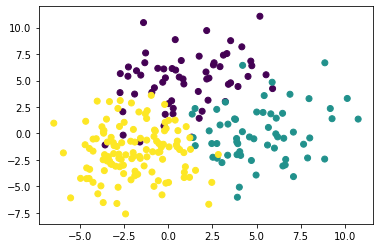

In [60]:
scatter(data[:,0], data[:,1], c=truelabels)
axis('tight')

The following line runs the classifier on the data in `data` with labels `truelabels`. It stores the predicted labels in a variable called `estimatedlabels` and prints out the classifier's error rate. Also, it runs the classifier on the data in `drdata` and store the labels outputted by the classifier into a variable called `drB` for visualization of decision regions.

In [61]:
estimatedlabels = q1.bayesClassifier(data,pi,means,cov)
print ("The Bayes classifier error rate is %.4f" % q1.classifierError(truelabels,estimatedlabels))
drB = q1.bayesClassifier(drdata,pi,means,cov)

The Bayes classifier error rate is 0.0958


Now, lets visualize the output of our classifier. 

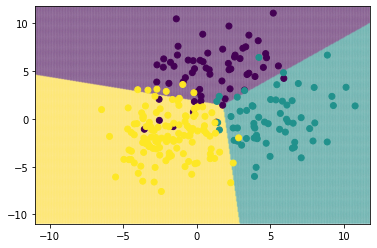

In [62]:
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True,shading='auto')
axis('tight')
scatter(data[:,0],data[:,1],c=truelabels)

You should observe linear boundaries between the decision regions and almost all the points are in the correct region for this problem. 

#### Problem 2 : Linear Discriminant Analysis (25 points)

In this problem, you will implement Linear Discriminant Analysis (LDA). You will use the Bayes classifier from Problem 1 to do this. You will be given:
* Training data feature vectors as a $(N,d)$ numpy.ndarray (trainfeat), where each row is a feature vector.
* Training data labels as a length $N$ numpy.ndarray (trainlabel)

The first function you will write will return a tuple of the estimates of the prior probabilities (as a $M$ length numpy.ndarray), means (as a $(M,d)$ numpy.ndarray) and covariance matrix (as a $(d,d)$ numpy.ndarray) in the LDA model. You may assume that labels $0,\ldots,$trainlabel.max() exist in order to avoid some error checking. 

A hint:
* You can use logical operations+slicing to index an array. For example, if you want to get all training feature vectors whose  labels are `i`, you can use `trainfeat[trainlabel==i]`

A function prototype is provided in *main.py*. <b>(10 points)</b>

Our training data is in a numpy array called `trainingdata`, with corresponding labels `traininglabels`. Our validation data is in a numpy array called `valdata`, with corresponding labels `vallabels`. The data format is the same as Problem 1. 

And we can visualize the training data:

(-10.915685, 10.307385, -9.623230000000001, 11.708630000000001)

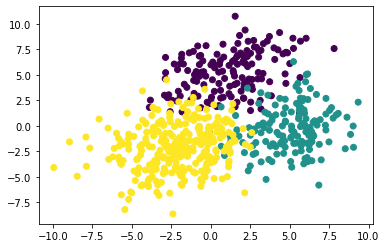

In [63]:
# We will use the following code to visualize the decision regions of the classifier.
# You don't need to look at this cell.

scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
axis('tight')

The following lines train the LDA classifier on the training data in `trainingdata`, and then they run the LDA classifier on the training data and the validation data. Store the predicted training labels in `esttrlabels` and the predicted labels on the validation data in `estvallabels`. Next, the errors are calculated. `drLDA` is calculated for visualization.

The function call is below, but you need to fill in the corresponding functions in *main.py*. **(10 points)**

In [64]:
q2 = Question2()
lpi, lmeans, lcov = q2.trainLDA(trainingdata,traininglabels)
print("The estimated priors are:")
print(lpi)
print("The estimated means are:")
print(lmeans)
print("The estimated covariance matrices are:")
print(lcov)
print("")
esttrlabels, trerror = q2.estTrainingLabelsAndError(trainingdata,traininglabels)
print("The training error for LDA is: %.4f" % trerror)
estvallabels, valerror = q2.estValidationLabelsAndError(trainingdata,traininglabels,valdata,vallabels)
print("The validation error for LDA is: %.4f" % valerror)
drLDA = q1.bayesClassifier(drdata,lpi,lmeans,lcov)

The estimated priors are:
[0.25 0.25 0.5 ]
The estimated means are:
[[ 1.12191279  5.17315581]
 [ 4.91358665 -0.28614234]
 [-2.07276858 -2.11161245]]
The estimated covariance matrices are:
[[4.67512737 1.04472481]
 [1.04472481 4.79078813]]

The training error for LDA is: 0.0733
The validation error for LDA is: 0.1083


The training data is generated with the distribution used in Problem 1, so your $\pi, \mu, {\sf C}$ should all be pretty close to the ones given in Problem 1. If they are not close, you've done something wrong. 

We can also visualize the performance of the classifier on the training and validation data. In this problem, both the training and validation data was generated from the distributions specified in Problem 1, so we show both the LDA classifier (which you learned from the data) and the Bayes classifier (which assumed you knew the true joint distribution of the data and the labels). 

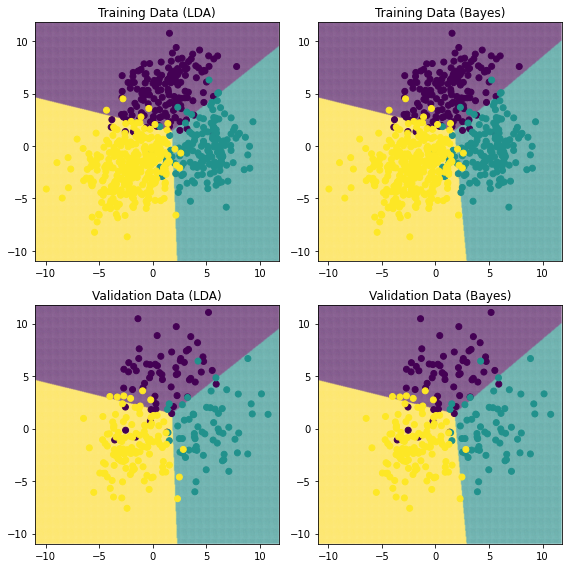

In [65]:
figure(figsize=(8, 8)) # If this is looking a bit squished, you can change the 8 (width) and 8 (height)
subplot(2,2,1)
pcolormesh(xx,yy,drLDA.reshape(xx.shape),alpha=0.1,antialiased=True,shading='auto')
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (LDA)')
subplot(2,2,2)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True,shading='auto')
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (Bayes)')
subplot(2,2,3)
pcolormesh(xx,yy,drLDA.reshape(xx.shape),alpha=0.1,antialiased=True,shading='auto')
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (LDA)')
subplot(2,2,4)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True,shading='auto')
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (Bayes)')
tight_layout()

Most of the points should be correctly classified in both the training and validation data. If they are not, you've done something wrong. 

#### Problem 3: k-Nearest Neighbors + Some Short Answer Questions (35 points)

In this problem, you will implement the k-Nearest Neighbors algorithm.

The following imports are copied from the beginning for your benefit.

In [66]:
import scipy.spatial.distance as dist
from scipy import stats
q3 = Question3()

Your function will take:
* Training data feature vectors as a $(N,d)$ numpy.ndarray (trainfeat), where each row is a feature vector
* Training data labels as a length $N$ numpy.ndarray (trainlabel)
* Test data feature vectors as a $(V,d)$ numpy.ndarray (testfeat), where each row is a feature vector
* The value of k

Use the Euclidean distance (scipy.spatial.distance.cdist) as your dissimilarity measure. Read the documentation!

Your function should return a length $V$ numpy.ndarray vector of the estimated labels. This should take around 4 lines of code. Do not use the kNN implementation in scikit-learn or similar.

Some functions which may be useful (read the documentation!):
* The numpy.argpartition function can be used to find the $k$ smallest elements of an array (via slicing)
* scipy.stats.mode can find the most common element in an array. Check the output.

<b>(10 points)</b>

The following code runs your k-Nearest Neighbors classifier with the training data in `trainingdata` and validation data in `valdata` from Problem 2, for $k=1,3,4,5$. It also shows the training and validation error rates on the data from Problem 2. <b>(5 points)</b>

Note that you should be using your `q3.kNN()` function in the function definition of `q3.kNN_errors()`

In [67]:
trainingError, validationError = q3.kNN_errors(trainingdata, traininglabels, valdata, vallabels)
k_array = [1,3,4,5]
for i in range(4):
    print("Case: k =", k_array[i])
    print("Training Error:", trainingError[i])
    print("Validation Error:", validationError[i])
    print("")

Case: k = 1
Training Error: 0.0
Validation Error: 0.1125

Case: k = 3
Training Error: 0.056666666666666664
Validation Error: 0.10833333333333334

Case: k = 4
Training Error: 0.06333333333333334
Validation Error: 0.10833333333333334

Case: k = 5
Training Error: 0.06
Validation Error: 0.1



In [68]:
#The remaining code for this question is only for your visualization. It will not be graded.
k=3 # Put the value of k you would choose in the variable k.
drK=q3.kNN(trainingdata,traininglabels,drdata,k)

Now, let us visualize the decision boundaries of your chosen value of $k$. 

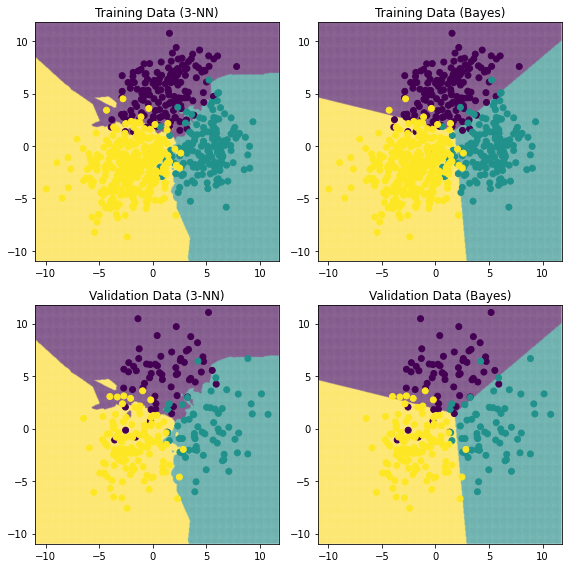

In [69]:
figure(figsize=(8, 8)) # If this is looking a bit squished, you can change the 8 (width) and 8 (height)
subplot(2,2,1)
pcolormesh(xx,yy,drK.reshape(xx.shape),alpha=0.1,antialiased=True,shading='auto')
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (%i-NN)'%k)
subplot(2,2,2)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True,shading='auto')
axis('tight')
scatter(trainingdata[:,0],trainingdata[:,1],c=traininglabels)
title('Training Data (Bayes)')
subplot(2,2,3)
pcolormesh(xx,yy,drK.reshape(xx.shape),alpha=0.1,antialiased=True,shading='auto')
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (%i-NN)'%k)
subplot(2,2,4)
pcolormesh(xx,yy,drB.reshape(xx.shape),alpha=0.1,antialiased=True,shading='auto')
axis('tight')
scatter(valdata[:,0],valdata[:,1],c=vallabels)
title('Validation Data (Bayes)')
tight_layout()

#### Problem 4: LDA and kNN using scikit-learn <b>(20 points)</b>

In many cases, you will be using other people's libraries to implement learning algorithms. In this problem, you will become familiar with scikit-learn's implementation of LDA and kNN.

First, we will load a data set of digits drawn from zip codes written on US mail. This data set was designed to help get good algorithms to sort mail by zip code automatically. It has been preprocessed a bit, with details given <a href="http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.info.txt">here</a>. Each feature vector consists of $16^2$ real values representing grayscale values of a 16 by 16 image of a digit. The training data has 7291 samples, while the validation data has 2007 samples. Note that this is not the same dataset built into scikit-learn -- it is much larger. 

In [75]:
#Loading the Data

#Read in the Training Data
traindata_tmp= genfromtxt('zip.train', delimiter=' ') 

#The training labels are stored in "trainlabels", training features in "traindata". Rows are feature vectors.
trainlabels=traindata_tmp[:,0]
traindata=traindata_tmp[:,1:]

#Read in the Validation Data
valdata_tmp= genfromtxt('zip.val', delimiter=' ') 

#The validation labels are stored in "vallabels", validation features in "valdata". Rows are feature vectors.
vallabels=valdata_tmp[:,0]
valdata=valdata_tmp[:,1:]

q4 = Question4()

Use scikit-learn's sklearn.neighbors.KNeighborsClassifier to run a Nearest Neighbor classifier (1-NN) on the validation data with the provided training set. Note that KNeighborsClassifier defaults to 5-NN. 

Measure the time for fitting the model and classification (the %timeit feature or time() or similar will be useful). Try the different algorithms possible to fit the model (ball tree, kd-tree and brute force, and use the fastest one in your code). Make sure to calculate the error on the validation set.  <b>(5 points)</b>

In [76]:
nnclassifier, knnvalerror, knnfitTime, knnpredTime = q4.sklearn_kNN(traindata,trainlabels,valdata,vallabels)
print("kNN Validation Error is:", knnvalerror)
print("kNN fitting Time is:", knnfitTime, "sec")
print("kNN prediction Time is:", knnpredTime, "sec")

kNN Validation Error is: 0.05630293971101146
kNN fitting Time is: 0.22099947929382324 sec
kNN prediction Time is: 2.4489998817443848 sec


Now, run LDA on the validation data set with scikit-learn's sklearn.discriminant_analysis.LinearDiscriminantAnalysis class. Measure the training time as well as the time used to classify the validation set. Make sure to calculate the error on the validation set.  <b>(5 points)</b>

In [77]:
ldaclassifier, ldavalerror, ldafitTime, ldapredTime = q4.sklearn_LDA(traindata,trainlabels,valdata,vallabels)
print("LDA Validation Error is:", ldavalerror)
print("LDA fitting Time is:", ldafitTime, "sec")
print("LDA prediction Time is:", ldapredTime, "sec")

LDA Validation Error is: 0.114598903836572
LDA fitting Time is: 0.14599943161010742 sec
LDA prediction Time is: 0.0009996891021728516 sec


Below are a few questions for you think about to further your understanding of these classifiers. These will not be graded. You could discuss these with other students or the TAs during the office hours.

(1) Based on the performance on the validation set, which algorithm would you pick (for this particular problem)? Your answer should also take into account computational resources required, error on the validation set, and the cost associated with making an error (in real life -- recall the source of the data).

(2) Do you think the 0,1-loss is appropriate error measure in this case? Why or why not? How can you use domain-specific knowledge to help improve performance for this application?

If you are interested in this in more detail on this problem, see O. Matan et al., "Reading Handwritten Digits: A ZIP Code Recognition System", IEEE Computer, Vol 25, Number 7, pp 59-63, 1992 (<a href="http://yann.lecun.com/exdb/publis/pdf/matan-92.pdf">tech report version here</a>). You do not need to look at this to answer the question.

## And this concludes Lab 2! Congratulations!